###**Import the necessary packages**

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

###**Download the dataset from keras API**

In [48]:
mnist = tf.keras.datasets.mnist

Split the dataset into Training and Testing Data

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


###**Visualize some images from Dataset**

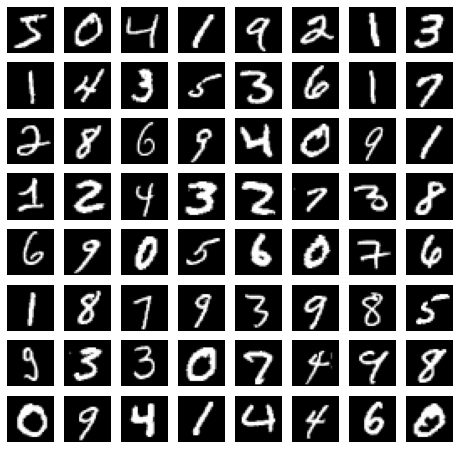

In [50]:
# Visualize the images
plt.figure(figsize = (8, 8))
for i in range(64):
  plt.subplot(8, 8, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')


###**Normalization the Data**

In [51]:
X_train = X_train / 255.0

###**Parameters Decleration**

In [52]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

###**Create the Generator**

In [53]:
# Declare the size of random noise
codings_size = 30

# Build the Generator
generator= keras.models.Sequential([
                keras.layers.Dense(100, activation = 'selu', input_shape = [codings_size]),
                keras.layers.Dense(150, activation = 'selu'),
                keras.layers.Dense(28 * 28, activation = 'sigmoid'),
                keras.layers.Reshape([28, 28])
])

###**Create a Discriminator**

In [54]:
discriminator = keras.models.Sequential([
                      keras.layers.Flatten(input_shape = [28,28]),
                      keras.layers.Dense(150, activation = 'selu'),
                      keras.layers.Dense(100, activation = 'selu'),
                      keras.layers.Dense(1, activation = 'sigmoid')
])

###**Create the GAN Neural Network**

In [55]:
gan = keras.models.Sequential([generator, discriminator])

###**Printout the Summary of the models**

In [56]:
generator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_16 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 136,634
Trainable params: 136,634
Non-trainable params: 0
_________________________________________________________________


In [57]:
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [58]:
gan.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 28, 28)            136634    
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 132951    
Total params: 269,585
Trainable params: 269,585
Non-trainable params: 0
_________________________________________________________________


###**Compile the Model**

In [59]:
discriminator.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'rmsprop'
)

discriminator.trainable = False

gan.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy'
)

###**Write a Custom Function for Training GAN**

In [62]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs = 10):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      # Training the Discriminator
      noice = tf.random.normal(shape = [batch_size, codings_size])

      # Generate the Images
      generated_images = generator(noice)

      # Change the input data type to Tensor Float
      X_batch = tf.cast(X_batch, tf.float32)

      # Combine the fake and real images
      X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)

      # Represent the labels as '1' for real images and '0' for fake images
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

      # Setting back discriminator to Trainable
      discriminator.trainable = True

      # Train the discriminator on fake and real images
      discriminator.train_on_batch(X_fake_and_real, y1)
      
      # Train the GAN
      noice = tf.random.normal(shape = [batch_size, codings_size])
      y2 = tf.constant(([1.] * batch_size))
      discriminator.trainable = False
      gan.train_on_batch(noice, y2)

  # Visualize the images
  plt.figure(figsize=(6,6))
  for i in range(32):
    plt.subplot(8, 4, 1+i)
    plt.axis('off')
    plt.imshow(generated_images[i], cmap = 'gray')

###**Train the GAN now**

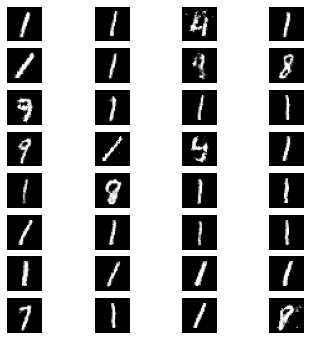

In [93]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs = 50)

###**Check for the Generated images**

(1, 28, 28)


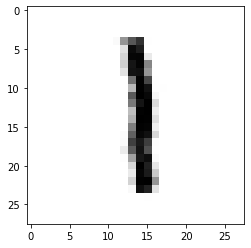

In [99]:
# Training the Discriminator
noice = tf.random.normal(shape = [1, codings_size])
# Generate the Images
generated_images = generator(noice)
print(generated_images.shape)
plt.figure()
plt.imshow(generated_images[0], cmap = 'gray_r')